In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

In [2]:
path = '../data/judicial_review_of_congress_database_1789-2018.xlsx'
df = pd.read_excel(path)
df.columns = df.columns.str.lower().str.replace(r'[ -]', '_')
print(df.shape)
df.head()

(1308, 25)


,case,citation,date,year,decade,decision,decision2,effect,stat_name,stat_cite,...,area2,lndmrk,lnddtl,att_gen,cert,reversd,crs,gvt_prty,dissent,h_ct
0,United States v. Yale Todd,"*54 U.S. 40, 52",2/17/1794,1794,1790,2,1,struck down on face,Invalid Pensions Act,1 Stat. 243,...,NaN,0.0,0.0,1,0,0.0,0.0,1,0,0
1,Penhallow v. Doane's Adm'rs,003 U.S. 054,2/24/1795,1795,1790,0,0,upheld,Court of Appeals Resolution,17 JCC 459,...,NaN,0.0,0.0,1,0,1.0,0.0,0,0,1
2,Hylton v. United States,003 U.S. 171,3/8/1796,1796,1790,0,0,upheld,Carriage Tax Act,1 Stat. 373,...,NaN,0.0,0.0,1,0,0.0,0.0,1,0,1
3,United States v. La Vengeance,003 U.S. 297,8/11/1796,1796,1790,0,0,upheld,Arms Exportation Act,1 Stat. 369,...,1.0,0.0,0.0,1,0,0.0,0.0,1,0,1
4,Mossman v. Higginson,004 U.S. 12,8/11/1800,1800,1800,1,1,struck down as applied,Judiciary Act of 1789,1 Stat. 73,...,6.0,1.0,0.0,0,0,0.0,0.0,0,0,0


In [3]:
df.columns

Index(['case', 'citation', 'date', 'year', 'decade', 'decision', 'decision2',
       'effect', 'stat_name', 'stat_cite', 'pl_#', 's_date',
       'time_to_decision', 'congress', 'area1', 'area2', 'lndmrk', 'lnddtl',
       'att_gen', 'cert', 'reversd', 'crs', 'gvt_prty', 'dissent', 'h_ct'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 25 columns):
case                1308 non-null object
citation            1308 non-null object
date                1308 non-null object
year                1308 non-null int64
decade              1308 non-null int64
decision            1308 non-null int64
decision2           1308 non-null int64
effect              1308 non-null object
stat_name           1308 non-null object
stat_cite           1308 non-null object
pl_#                1011 non-null object
s_date              1308 non-null object
time_to_decision    1308 non-null int64
congress            1308 non-null int64
area1               1308 non-null int64
area2               347 non-null float64
lndmrk              1307 non-null float64
lnddtl              1307 non-null float64
att_gen             1308 non-null int64
cert                1308 non-null int64
reversd             1307 non-null float64
crs                 1301 non-null floa

In [5]:
df.describe()

,year,decade,decision,decision2,time_to_decision,congress,area1,area2,lndmrk,lnddtl,att_gen,cert,reversd,crs,gvt_prty,dissent,h_ct
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,347.000000,1307.000000,1307.000000,1308.000000,1308.000000,1307.000000,1301.000000,1308.000000,1308.000000,1308.000000
mean,1941.563456,1937.102446,0.381498,0.263761,180.935780,69.229358,3.459480,3.426513,0.488141,0.211936,0.819572,0.471713,0.445295,0.146042,0.775994,1.354740,0.470183
std,44.444353,44.566416,0.686871,0.440840,224.883063,23.240718,1.791515,1.879980,0.500051,0.408836,0.384691,0.499390,0.497189,0.353284,0.417086,1.597483,0.499301
min,1794.000000,1790.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1914.750000,1910.000000,0.000000,0.000000,47.000000,56.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1943.000000,1940.000000,0.000000,0.000000,102.000000,73.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1977.000000,1970.000000,1.000000,1.000000,233.000000,85.000000,5.000000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000
max,2018.000000,2010.000000,2.000000,1.000000,2332.000000,113.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000


In [6]:
df.describe(exclude='number')

,case,citation,date,effect,stat_name,stat_cite,pl_#,s_date
count,1308,1308,1308,1308,1308,1308,1011,1308
unique,1294,1306,1046,4,768,940,508,653
top,New York v. United States,307 U.S. 174,1927-05-16 00:00:00,upheld,Immigration and Nationality Act,1 Stat. 73,82-414,1952-06-27 00:00:00
freq,3,2,5,963,21,15,21,22


In [7]:
def wrangle(X):
    X = X.copy()
    
    # 'decision', 'decision2', and 'effect' contain target information
    # 'citation', 'date', 'year', 'decade', and 'dissent' are not known until after a decision
    # 'pl_#' congress info is duplicated in 'congress' and the other info is random
    # 's_date' is dropped in favor of the slightly coarser 'congress' feature
    # 'lndmark', 'lnddtl', and 'crs' are not relevant
    
    columns_to_drop = ['decision', 'decision2', 'effect', 'citation', 'date', 'year', 'decade',
                       'dissent', 'pl_#', 's_date', 'lndmrk', 'lnddtl', 'crs']
    
    # Create features for cases in which the United States is the first or last party
    X['us_first_party'] = X['case'].str.startswith('United States v', na=False).astype(int)
    X['us_last_party'] = X['case'].str.endswith('v. United States', na=False).astype(int)
    columns_to_drop.append('case')
    
    # 'reversd' is not known before a decision, but we can engineer a feature describing the lower court's decision
    swap = X['reversd'] == 1
    decision = X['decision2'] == 1
    lower_court_decision = [not dec if swap else dec for dec, swap in zip(decision, swap)]
    X['lower_court_decision'] = np.array(lower_court_decision).astype(int)
    columns_to_drop.append('reversd')
    
    # For 'area2' values: keep 1 though 6, and add 7 in place of nulls
    X['area2'] = X['area2'].fillna(value=7).astype(int)
    
    # Drop unnecessary or unknowable features
    X = X.drop(columns=columns_to_drop)
    
    # return the wrangled dataframe
    return X

In [8]:
# Leave 1,000 observations for cross-validation
train, test = train_test_split(df, test_size=308, stratify=df['decision'], random_state=42)
train.shape, test.shape

((1000, 25), (308, 25))

In [9]:
# Create targets and wrangle dataframe. Note that the target is not dropped before
# wrangling so that it can be used to create 'lower_court_decision' feature
y_train = train['decision2']
y_test = test['decision2']

X_train = wrangle(train)
X_test = wrangle(test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1000, 13), (308, 13), (1000,), (308,))

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

def show_results(y_true, y_pred):
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print(f'ROC_AUC:        {roc_auc_score(y_test, y_pred)}\n')
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_true, y_pred)

In [11]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

In [12]:
%%time
pipeline.fit(X_train, y_train)

CPU times: user 223 ms, sys: 30.6 ms, total: 253 ms
Wall time: 169 ms


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['stat_name', 'stat_cite'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'stat_name',
                                          'data_type': dtype('O'),
                                          'mapping': Revenue Act of 1925                                                                        1
Hepburn Act (Interstate Commerce)                                                          2
National Highway System Designation Act of 1995                                            3
National Labor Relations Act                                                               4
80 Stat. 378                                                                               5
Pos...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstr

In [13]:
y_pred = pipeline.predict(X_test)

In [14]:
pipelineb = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced', random_state=42)
)

In [15]:
%%time
pipelineb.fit(X_train, y_train)

CPU times: user 230 ms, sys: 32.4 ms, total: 262 ms
Wall time: 177 ms


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['stat_name', 'stat_cite'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'stat_name',
                                          'data_type': dtype('O'),
                                          'mapping': Revenue Act of 1925                                                                        1
Hepburn Act (Interstate Commerce)                                                          2
National Highway System Designation Act of 1995                                            3
National Labor Relations Act                                                               4
80 Stat. 378                                                                               5
Pos...
                 RandomForestClassifier(bootstrap=True, class_weight='balanced',
         

In [16]:
y_predb = pipelineb.predict(X_test)

Accuracy score: 0.7402597402597403
ROC_AUC:        0.5617555881873062

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       227
           1       0.52      0.19      0.27        81

    accuracy                           0.74       308
   macro avg       0.64      0.56      0.56       308
weighted avg       0.70      0.74      0.69       308



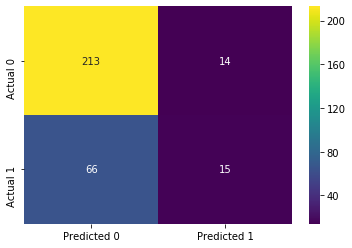

In [17]:
show_results(y_test, y_pred)

Accuracy score: 0.7467532467532467
ROC_AUC:        0.5582204818621852

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       227
           1       0.57      0.16      0.25        81

    accuracy                           0.75       308
   macro avg       0.66      0.56      0.55       308
weighted avg       0.71      0.75      0.69       308



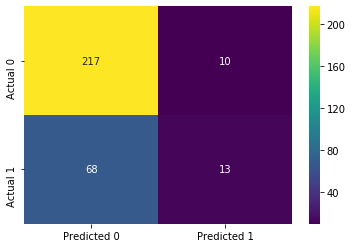

In [18]:
show_results(y_test, y_predb)

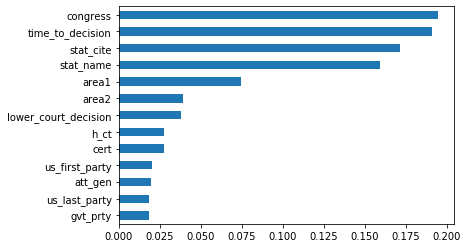

In [19]:
model = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(model.feature_importances_, X_train.columns)
importances.sort_values().plot.barh();

In [20]:
import eli5
encoder = ce.OrdinalEncoder()
E_train = encoder.fit_transform(X_train)
E_test = encoder.transform(X_test)

Emodel = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
Emodel.fit(E_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [21]:
permuter = eli5.sklearn.PermutationImportance(
    Emodel, scoring='accuracy', n_iter=10, random_state=42
)

permuter.fit(E_test, y_test)
feature_names = X_test.columns.tolist()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0195 ± 0.0136,lower_court_decision
0.0123 ± 0.0217,congress
0.0052 ± 0.0151,area1
0.0052 ± 0.0146,h_ct
0.0052 ± 0.0143,cert
0.0049 ± 0.0152,us_last_party
0.0045 ± 0.0066,us_first_party
0.0013 ± 0.0078,att_gen
0.0006 ± 0.0132,area2
0.0006 ± 0.0192,time_to_decision


In [22]:
more_drops = ['att_gen', 'area2', 'time_to_decision', 'gvt_prty', 'stat_name', 'stat_cite']
D_train = X_train.drop(columns=more_drops)
D_test = X_test.drop(columns=more_drops)

D_train.shape, D_test.shape

((1000, 7), (308, 7))

Accuracy score: 0.7175324675324676
ROC_AUC:        0.5939794419970631

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       227
           1       0.45      0.33      0.38        81

    accuracy                           0.72       308
   macro avg       0.62      0.59      0.60       308
weighted avg       0.69      0.72      0.70       308



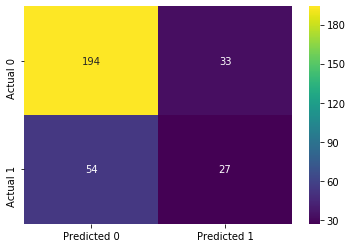

In [25]:
D_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

D_pipeline.fit(D_train, y_train)

D_pred = D_pipeline.predict(D_test)

show_results(y_test, D_pred)

In [27]:
max([estimator.tree_.max_depth for estimator in Emodel.estimators_])

23